In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array = [1,2,3,4,5]
e = pd.Series(data=array, index=['a','b','c','d','e'])

print(e)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [57]:
index = ['Doom', 'Street Fighter 6', 'League of Legends']
array = [20, 60, 0]
year = ['2000', '2023', '2011']
ser = pd.Series(data=array, index=index )
df = ser.to_frame()
df.columns = ['price']

print(ser)
print(df)

Doom                 20
Street Fighter 6     60
League of Legends     0
dtype: int64
                   price
Doom                  20
Street Fighter 6      60
League of Legends      0


In [58]:
index = ['Doom', 'Street Fighter 6', 'League of Legends']
info = [20, 60, 0]

ser = pd.Series(data=array, index=info )
df = ser.to_frame()
df.columns = ['price']
df['year of release'] = ['2000', '2023', '2011']

print(ser)
print(df.describe())
print(df.columns)

20    20
60    60
0      0
dtype: int64
           price
count   3.000000
mean   26.666667
std    30.550505
min     0.000000
25%    10.000000
50%    20.000000
75%    40.000000
max    60.000000
Index(['price', 'year of release'], dtype='object')


In [59]:
csv = pd.read_csv('Song.csv')

print(csv)
print(len(csv))
print(list(csv.columns.values))
print(csv.dtypes)

                       Artist                              Title  Year  \
0     Bill Haley & his Comets              Rock Around the Clock  1955   
1                 Celine Dion                My Heart Will Go On  1998   
2             Sinead O'Connor               Nothing Compares 2 U  1990   
3                 The Beatles                           Hey Jude  1968   
4                 Bryan Adams  (Everything I Do) I Do it For You  1991   
...                       ...                                ...   ...   
4845                  Rihanna       If It's Lovin' That You Want  2005   
4846                Al Jolson                          All Alone  1925   
4847                   Sailor                Girls, Girls, Girls  1976   
4848             Inner Circle                  Games People Play  1994   
4849                  The Who                    See Me, Feel Me  1970   

       Sales  Streams  Downloads  Radio Plays  Rating  
0     36.503   19.961      7.458        5.663   0.760  

In [60]:
year_csv = csv.query('Year > 2011')
year_csv.sort_values(by=['Sales'])
year_csv = year_csv.iloc[:, [0,1]]
print(year_csv)

                                      Artist                         Title
177                           Gotye & Kimbra  Somebody That I Used to Know
261                         Carly Rae Jepsen                 Call Me Maybe
522   Robin Thicke, T.I. & Pharrell Williams                 Blurred Lines
664                                      Psy                 Gangnam Style
707                                     fun.                  We Are Young
...                                      ...                           ...
4365                             Michel Telo             Ai se eu te pego!
4382                 Macklemore & Ryan Lewis                 Can't Hold Us
4427                             Chris Brown              Don't Wake Me Up
4587                                   Ke$ha                     Die Young
4804                                Rita Ora             How We Do (Party)

[65 rows x 2 columns]


In [61]:
artist = csv.groupby(['Artist'])['Sales'].sum().reset_index(name="Sales")
artist = artist.sort_values(by=['Sales'], ascending=False)
print(artist)

                          Artist    Sales
1902                 The Beatles  601.356
1242                     Madonna  517.961
617                Elvis Presley  476.344
2025          The Rolling Stones  293.326
1333             Michael Jackson  285.204
...                          ...      ...
1445                   O C Smith    4.160
2040             The Sex Pistols    4.160
1226            Lyte Funkie Ones    4.158
1246                 Major Lance    4.151
241   Bob Crosby & his Orchestra    4.151

[2243 rows x 2 columns]


[['The Beatles' 601.356]
 ['Madonna' 517.961]
 ['Elvis Presley' 476.344]
 ...
 ['Lyte Funkie Ones' 4.158]
 ['Major Lance' 4.151]
 ['Bob Crosby & his Orchestra' 4.151]]


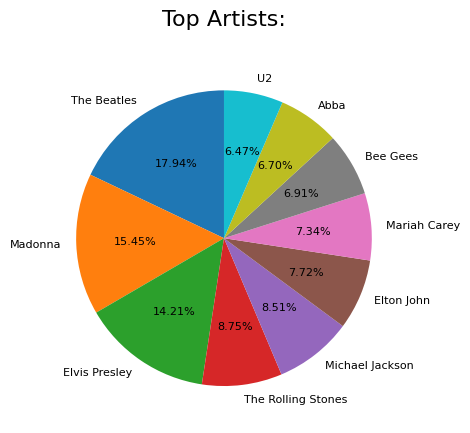

In [76]:
artistList = artist.to_numpy()
label = []
data = []
for i in range(10):
    label.append(artistList[i][0])
    data.append(artistList[i][1])

plt.pie(data, labels=label, autopct='%1.2f%%', textprops={'fontsize':8}, startangle=90, )
plt.title(label="Top Artists:", fontdict={"fontsize":16}, pad=20)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.show()

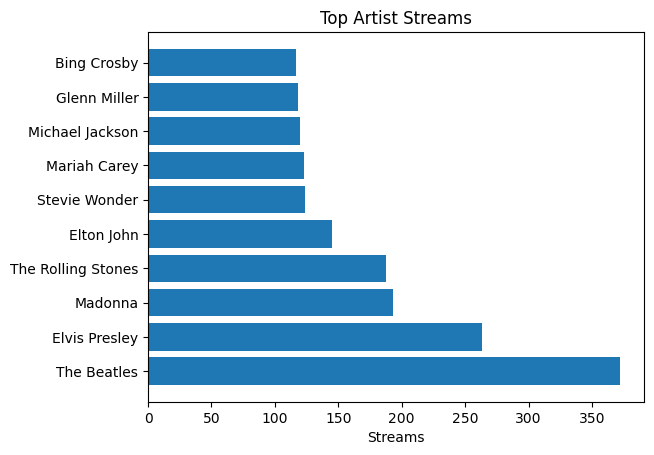

In [63]:
artist2 = csv.groupby(['Artist'])['Streams'].sum().reset_index(name="Streams")
artist2 = artist2.sort_values(by=['Streams'], ascending=False)

artistList2 = artist2.to_numpy()
label2 = []
data2 = []
for i in range(10):
    label2.append(artistList2[i][0])
    data2.append(artistList2[i][1])

plt.barh(label2, width=data2, align='center')
plt.xlabel('Streams')
plt.title('Top Artist Streams')

plt.show()

601.356
476.344
517.961
293.326
258.627
141.606
246.102
285.204
155.06
167.138
[['The Beatles' 372.532]
 ['Elvis Presley' 263.591]
 ['Madonna' 193.413]
 ['The Rolling Stones' 187.99]
 ['Elton John' 145.383]
 ['Stevie Wonder' 123.636]
 ['Mariah Carey' 123.294]
 ['Michael Jackson' 120.087]
 ['Glenn Miller' 117.937]
 ['Bing Crosby' 116.705]]


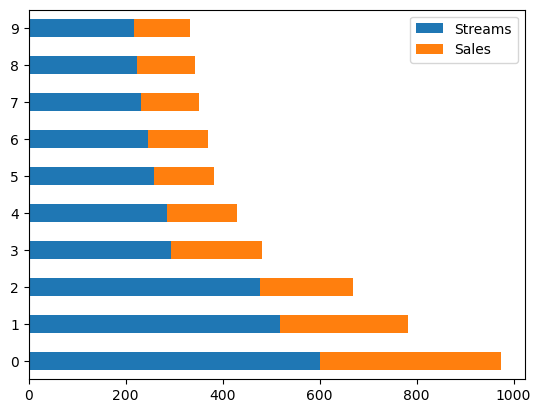

<class 'matplotlib.units.ConversionError'>: Failed to convert value(s) to axis units: ['The Beatles', 'Elvis Presley', 'Madonna', 'The Rolling Stones', 'Elton John', 'Stevie Wonder', 'Mariah Carey', 'Michael Jackson', 'Glenn Miller', 'Bing Crosby']

In [84]:
artistList3 = artist2.to_numpy()
artistList3 = np.array(temp)
for i in range(10):
    for j in range(100):
        if artistList3[i][0] == artistList[j][0]:
            print(artistList[j][1])
            np.append(artistList3[i], [artistList[j][1]])

print(artistList3)

bar = label3
df = pd.DataFrame({
    "Streams": np.array(data),
    "Sales": np.array(data2)
})

ax = df.plot.barh(stacked=True);
ax.set_yticks(bar)

ax.set_title('Top 10 Stream and Sales')
ax.legend(loc="upper right")
plt.show()